# --- Day 20: Particle Swarm ---
Suddenly, the GPU contacts you, asking for help. Someone has asked it to simulate too many particles, and it won't be able to finish them all in time to render the next frame at this rate.

It transmits to you a buffer (your puzzle input) listing each particle in order (starting with particle 0, then particle 1, particle 2, and so on). For each particle, it provides the X, Y, and Z coordinates for the particle's position (p), velocity (v), and acceleration (a), each in the format <X,Y,Z>.

Each tick, all particles are updated simultaneously. A particle's properties are updated in the following order:

- Increase the X velocity by the X acceleration.
- Increase the Y velocity by the Y acceleration.
- Increase the Z velocity by the Z acceleration.
- Increase the X position by the X velocity.
- Increase the Y position by the Y velocity.
- Increase the Z position by the Z velocity.

Because of seemingly tenuous rationale involving z-buffering, the GPU would like to know which particle will stay closest to position <0,0,0> in the long term. Measure this using the Manhattan distance, which in this situation is simply the sum of the absolute values of a particle's X, Y, and Z position.

For example, suppose you are only given two particles, both of which stay entirely on the X-axis (for simplicity). Drawing the current states of particles 0 and 1 (in that order) with an adjacent a number line and diagram of current X positions (marked in parenthesis), the following would take place:

```
p=< 3,0,0>, v=< 2,0,0>, a=<-1,0,0>    -4 -3 -2 -1  0  1  2  3  4
p=< 4,0,0>, v=< 0,0,0>, a=<-2,0,0>                         (0)(1)

p=< 4,0,0>, v=< 1,0,0>, a=<-1,0,0>    -4 -3 -2 -1  0  1  2  3  4
p=< 2,0,0>, v=<-2,0,0>, a=<-2,0,0>                      (1)   (0)

p=< 4,0,0>, v=< 0,0,0>, a=<-1,0,0>    -4 -3 -2 -1  0  1  2  3  4
p=<-2,0,0>, v=<-4,0,0>, a=<-2,0,0>          (1)               (0)

p=< 3,0,0>, v=<-1,0,0>, a=<-1,0,0>    -4 -3 -2 -1  0  1  2  3  4
p=<-8,0,0>, v=<-6,0,0>, a=<-2,0,0>                         (0)   
```

At this point, particle 1 will never be closer to <0,0,0> than particle 0, and so, in the long run, particle 0 will stay closest.

Which particle will stay closest to position `<0,0,0>` in the long term?

In [237]:
# the puzzle input
with open('puzzle_inputs/day20_input.txt') as f:
    data = f.read().strip().split("\n")
puzzle_input = [line for line in data]
puzzle_input[:3]

['p=<-833,-499,-1391>, v=<84,17,61>, a=<-4,1,1>',
 'p=<-168,3586,-2721>, v=<-61,-58,61>, a=<7,-13,8>',
 'p=<364,223,1877>, v=<31,-11,-71>, a=<-5,0,-3>']

This looks like a job for namedtuple and dicts:

In [238]:
from collections import namedtuple, defaultdict
import numpy as np

particle = namedtuple("Particle", ["pos", "vel", "acc"])
particles = {}

for i, line in enumerate(puzzle_input):
    p, v, a= line.split(", ")
    pos = np.array([int(i) for i in p.split("=<")[1][:-1].split(",")])
    vel = np.array([int(i) for i in v.split("=<")[1][:-1].split(",")])
    acc = np.array([int(i) for i in a.split("=<")[1][:-1].split(",")])
    particles[i] = particle(pos, vel, acc)

The test input is:

In [239]:
t = {}
t[0] = particle(np.array([3,0,0]), np.array([2,0,0]), np.array([-1,0,0]))
t[1] = particle(np.array([4,0,0]), np.array([0,0,0]), np.array([-2,0,0]))
t

{0: Particle(pos=array([3, 0, 0]), vel=array([2, 0, 0]), acc=array([-1,  0,  0])),
 1: Particle(pos=array([4, 0, 0]), vel=array([0, 0, 0]), acc=array([-2,  0,  0]))}

some helper functions:

In [265]:
def manhatten(list_nums):
    """takes in a list of numbers, returns manhatten distance"""
    return sum(abs(k) for k in list_nums)

## Part 1

For part 1, the particle with the smallest acc will stick around closest to the origin. in case of a tie, look at the velocities, the the position.

First up, the min acc is:

In [276]:
accels = [manhatten(p.acc) for k, p in particles.items()]
min_acc = min(accels)
f"Smallest acc: {min_acc}, Count {accels.count(min_acc)}"

'Smallest acc: 1, Count 2'

so the smallest acceleration is 1, with there being two particles. now to collect these two particles:

In [275]:
min_acc_particles = {k:p for k, p in particles.items() if manhatten(p.acc) == min_acc}
min_acc_particles

{21: Particle(pos=array([-1984652,   190485,  -294638]), vel=array([-1992,    97,  -150]), acc=array([-1,  0,  0])),
 457: Particle(pos=array([  72729, 1951294, -338169]), vel=array([  37, 1975, -172]), acc=array([0, 1, 0]))}

In [278]:
for k, p in min_acc_particles.items():
    print(k, manhatten(p.pos), manhatten(p.vel))

21 2469775 2239
457 2362192 2184


The lower velocity particle wins. If the velocity had tied, then consider the position.

## Part 2

Delete particles which occupy the same position.

In [281]:
particles[0]

Particle(pos=array([-7836833,  2034501,  2121609]), vel=array([-7916,  2017,  2061]), acc=array([-4,  1,  1]))

In [284]:
def update_particles(particles=particles, t=1):
    """updates particles by given timestep, defaulting to 1 ts"""
    for _ in range(t):
        for key, p in particles.items():
            vel = p.vel + p.acc
            pos = p.pos + vel
            acc = p.acc
            particles[key] = particle(pos, vel, acc)

update_particles()
particles[0]

Particle(pos=array([-7844753,  2036519,  2123671]), vel=array([-7920,  2018,  2062]), acc=array([-4,  1,  1]))

In [299]:
a = [1,1,2,3,4,5,5,6,7,8,9,9]
np.bincount(a)

array([0, 2, 1, 1, 1, 2, 1, 1, 1, 2])

In [318]:
u, ind, c = np.unique(a, return_counts=True, return_index=True)
[u for u,c in zip(u,c) if c==1]

[2, 3, 4, 6, 7, 8]

In [333]:
[ind for u,ind,c in zip(u,ind, c) if c==1]

[2, 3, 4, 7, 8, 9]

In [334]:
for k in [2, 3, 4, 7, 8, 9]:
    print(a[k])

2
3
4
6
7
8


In [310]:
from collections import Counter

def del_pos_collisions(particles=particles):
    """deletes those particles which have the same pos"""
    keys = []
    pos = []
    for key, p in particles.items():
        keys.append(key)
        pos.append(p.pos)
    unique, counts = np.unique(pos, return_counts=True)
    
del_pos_collisions()

2


In [257]:

distances = defaultdict(list)
accel = defaultdict(list)
TICKS = 1000

for _ in range(TICKS):
    for key, p in particles.items():
        vel = p.vel + p.acc
        pos = p.pos + vel
        acc = p.acc
        particles[key] = particle(pos, vel, acc)
        distances[key].append(sum([abs(i) for i in p.pos]))
        accel[key].append(abs(sum(acc)))

In [258]:
min_acc = float('inf')
min_pos = float('inf')
part_key = None
part = None

for key, p in particles.items():
    #print(key, p.acc, sum(p.acc))
    acc = abs(sum(p.acc))
    pos = abs(sum(p.pos))
    
    if acc < min_acc:
        min_acc = acc
        min_pos = pos
        part = p
        part_key = key
        
part_key, part

(33,
 Particle(pos=array([   47629, -4049280,  4277294]), vel=array([   24, -4024,  4139]), acc=array([ 0, -2,  2])))

In [263]:
ans = []
for key, p in particles.items():
    abs_acc = sum([abs(a) for a in p.acc])
    if abs_acc == min_acc:
        ans.append(key)
        
ans_pos = float('inf')
ans_key = None
for k in ans:
    pos = sum([abs(i) for i in particles[k].pos])
    if pos < ans_pos:
        ans_pos = pos
        ans_key = k
k, particles[k]

(915,
 Particle(pos=array([ 39560360,     78288, -39433969]), vel=array([ 39771,     39, -39708]), acc=array([ 20,   0, -20])))

In [260]:
min_dist = float('inf')
min_key = None

for key, dist in distances.items():
    #plt.plot(dist, label=key)
    if abs(dist[-1]) < abs(min_dist):
        min_dist = dist[-1]
        min_key = key
#plt.title(f"The answer is {min_key}")
#plt.show()
min_dist, min_key

(2360008, 457)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

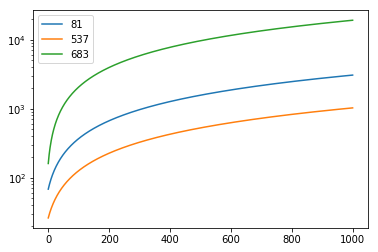

In [245]:
for key in distances:
    #print(abs(distances[key][-1]))
    if abs(distances[key][-1]) < 2*10**4:
        plt.semilogy(distances[key], label=key)
plt.legend()
plt.show()

In [246]:
from scipy.stats import linregress

small_key = None
small_slope = float('inf')
s_intercept = float('inf')

s = []

for key, dist in distances.items():
    #print(key, dist)
    lin = linregress(range(TICKS), dist)
    #print(lin.intercept, lin.slope)
    slope = abs(lin.slope)
    s.append(slope)
    if slope < abs(small_slope):
        small_key = key
        small_slope = lin.slope
        s_intercept = lin.intercept

small_key, small_slope, s_intercept

(537, 1.0, 26.0)

In [136]:
[abs(i) for i in s].index(1)

392